In [1]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams

In [2]:
f = open('5 papers.txt','rt')
corpus = f.read()

In [3]:
# regex gets rid of the puncuation
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(corpus)

# creates the n-grams using nltk's ngrams()
bigram = list(ngrams(tokens, 2))
trigram = list(ngrams(tokens, 3))
fourgram = list(ngrams(tokens, 4))

In [4]:
import random

def generate_sentence(model, num_words):
    words = random.choice(model)
    # choose a random word that isn't lower
    while words[0].islower():
                words = random.choice(model)
    sentence = list(words)
    
    # generate num_words sentences
    while len(sentence) < num_words:
        # take the last word of the n-gram (word[:-1]) and then
        # compare it to the first word of the next n-gram (words[1:])
        next_words = [word for word in model if word[:-1] == words[1:]]
        
        # if are no more words that follow the n-grams...
        if not next_words:
            words = random.choice(model)
            while words[0].islower():
                words = random.choice(model)
            sentence += list(words)
        # else, add another word and ensure the sentence is 10 words
        else:
            words = random.choice(next_words)
            sentence.append(words[-1])

    return ' '.join(sentence)

In [5]:
for i in range(5):
    print('Bigram ', i+1, ':', generate_sentence(bigram, 10))
   
print('\n')

for i in range(5):
    print('Trigram ', i+1, ':', generate_sentence(trigram, 10))

print('\n')

for i in range(5):
    print('Fourgram ', i+1, ':', generate_sentence(fourgram, 10))

Bigram  1 : Digital finance for assessing the blockchain will be a significant
Bigram  2 : Financing and NFT CNFT are 2018 contracts on financial intermediaries
Bigram  3 : The work for which includes all peer review can be
Bigram  4 : 2020 according to maintain the private blockchain infrastructure is highly
Bigram  5 : In addition the one is not dealing with the journals


Trigram  1 : Data Format Specification This has important guiding value for the
Trigram  2 : For the securities industry the blockchain such as roulettes card
Trigram  3 : They must comply with time constraints Gambling are programs implementing
Trigram  4 : For each category divided by year highlighting that the program
Trigram  5 : The blockchain system is becoming a trend especially for degree


Fourgram  1 : For traditional financial institutions and Internet companies to realize financing
Fourgram  2 : ELTC contracts over time almost overlap giving proof of the
Fourgram  3 : CA ecosystem C Zero Knowledge Proof

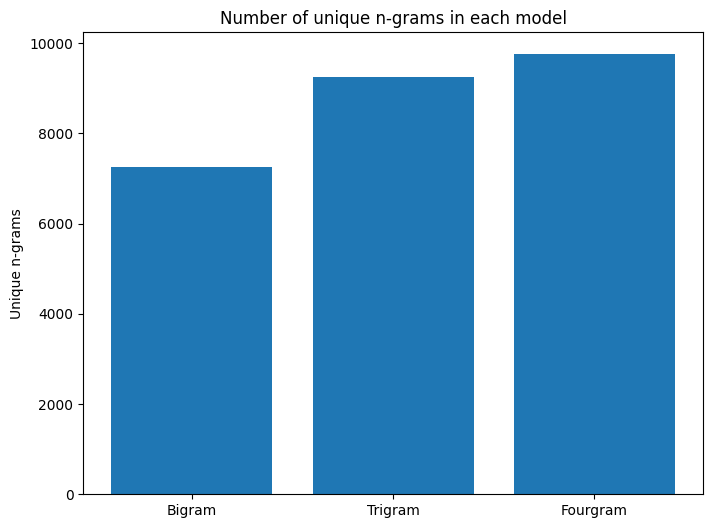

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# compute the number of unique n-grams in each model
num_unique_bigrams = len(set(bigram))
num_unique_trigrams = len(set(trigram))
num_unique_fourgrams = len(set(fourgram))

# plot the results
plt.figure(figsize=(8, 6))
plt.bar(['Bigram', 'Trigram', 'Fourgram'], [num_unique_bigrams, num_unique_trigrams, num_unique_fourgrams])
plt.title('Number of unique n-grams in each model')
plt.ylabel('Unique n-grams')
plt.show()